# Financial Planning with APIs and Simulations

In this Challenge, you’ll create two financial analysis tools by using a single Jupyter notebook:

Part 1: A financial planner for emergencies. The members will be able to use this tool to visualize their current savings. The members can then determine if they have enough reserves for an emergency fund.

Part 2: A financial planner for retirement. This tool will forecast the performance of their retirement portfolio in 30 years. To do this, the tool will make an Alpaca API call via the Alpaca SDK to get historical price data for use in Monte Carlo simulations.

You’ll use the information from the Monte Carlo simulation to answer questions about the portfolio in your Jupyter notebook.



In [1]:
# Import the required libraries and dependencies
import os
import requests
import json
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
# Load the environment variables from the .env file
#by calling the load_dotenv function
load_dotenv()

True

## Part 1: Create a Financial Planner for Emergencies

### Evaluate the Cryptocurrency Wallet by Using the Requests Library

In this section, you’ll determine the current value of a member’s cryptocurrency wallet. You’ll collect the current prices for the Bitcoin and Ethereum cryptocurrencies by using the Python Requests library. For the prototype, you’ll assume that the member holds the 1.2 Bitcoins (BTC) and 5.3 Ethereum coins (ETH). To do all this, complete the following steps:

1. Create a variable named `monthly_income`, and set its value to `12000`.

2. Use the Requests library to get the current price (in US dollars) of Bitcoin (BTC) and Ethereum (ETH) by using the API endpoints that the starter code supplies.

3. Navigate the JSON response object to access the current price of each coin, and store each in a variable.

    > **Hint** Note the specific identifier for each cryptocurrency in the API JSON response. The Bitcoin identifier is `1`, and the Ethereum identifier is `1027`.

4. Calculate the value, in US dollars, of the current amount of each cryptocurrency and of the entire cryptocurrency wallet.



In [3]:
# The current number of coins for each cryptocurrency asset held in the portfolio.
btc_coins = 1.2
eth_coins = 5.3

#### Step 1: Create a variable named `monthly_income`, and set its value to `12000`.

In [4]:
# The monthly amount for the member's household income
monthly_income = 12000


#### Review the endpoint URLs for the API calls to Free Crypto API in order to get the current pricing information for both BTC and ETH.

In [5]:
# The Free Crypto API Call endpoint URLs for the held cryptocurrency assets
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

#### Step 2. Use the Requests library to get the current price (in US dollars) of Bitcoin (BTC) and Ethereum (ETH) by using the API endpoints that the starter code supplied.

In [6]:
# Using the Python requests library, make an API call to access the current price of BTC
btc_response = requests.get(btc_url).json()

# Use the json.dumps function to review the response data from the API call
# Use the indent and sort_keys parameters to make the response object readable
print(json.dumps(btc_response, indent=4, sort_keys=True))


{
    "data": {
        "1": {
            "circulating_supply": 18942756,
            "id": 1,
            "last_updated": 1643426608,
            "max_supply": 21000000,
            "name": "Bitcoin",
            "quotes": {
                "USD": {
                    "market_cap": 713154894527,
                    "percent_change_1h": 0.240160607274239,
                    "percent_change_24h": 1.10267669163824,
                    "percent_change_7d": 3.43340309599833,
                    "percentage_change_1h": 0.240160607274239,
                    "percentage_change_24h": 1.10267669163824,
                    "percentage_change_7d": 3.43340309599833,
                    "price": 37762.0,
                    "volume_24h": 17972172603
                }
            },
            "rank": 1,
            "symbol": "BTC",
            "total_supply": 18942756,
            "website_slug": "bitcoin"
        }
    },
    "metadata": {
        "error": null,
        "num_cryptocurrencies"

In [7]:
# Using the Python requests library, make an API call to access the current price ETH
eth_response = requests.get(eth_url).json()

# Use the json.dumps function to review the response data from the API call
# Use the indent and sort_keys parameters to make the response object readable
print(json.dumps(eth_response, indent=4, sort_keys=True))

{
    "data": {
        "1027": {
            "circulating_supply": 119354466,
            "id": 1027,
            "last_updated": 1643426619,
            "max_supply": 0,
            "name": "Ethereum",
            "quotes": {
                "USD": {
                    "market_cap": 303231801406,
                    "percent_change_1h": -0.032704592958243,
                    "percent_change_24h": 4.19226165706731,
                    "percent_change_7d": -0.71664864723299,
                    "percentage_change_1h": -0.032704592958243,
                    "percentage_change_24h": 4.19226165706731,
                    "percentage_change_7d": -0.71664864723299,
                    "price": 2545.97,
                    "volume_24h": 13683383624
                }
            },
            "rank": 2,
            "symbol": "ETH",
            "total_supply": 119354466,
            "website_slug": "ethereum"
        }
    },
    "metadata": {
        "error": null,
        "num_cryptocurr

#### Step 3: Navigate the JSON response object to access the current price of each coin, and store each in a variable.

In [8]:
# Navigate the BTC response object to access the current price of BTC
btc_price = btc_response["data"]['1']['quotes']['USD']['price']

# Print the current price of BTC
btc_price


37762.0

In [9]:
# Navigate the BTC response object to access the current price of ETH
eth_price = eth_response["data"]['1027']['quotes']['USD']['price']

# Print the current price of ETH
eth_price


2545.97

### Step 4: Calculate the value, in US dollars, of the current amount of each cryptocurrency and of the entire cryptocurrency wallet.

In [10]:
# Compute the current value of the BTC holding 
btc_value = btc_price * btc_coins

# Print current value of your holding in BTC
btc_value


45314.4

In [11]:
# Compute the current value of the ETH holding 
eth_value = eth_price * eth_coins

# Print current value of your holding in ETH
eth_value


13493.640999999998

In [12]:
# Compute the total value of the cryptocurrency wallet
# Add the value of the BTC holding to the value of the ETH holding
total_crypto_wallet = btc_value+eth_value

# Print current cryptocurrency wallet balance
total_crypto_wallet


58808.041

### Evaluate the Stock and Bond Holdings by Using the Alpaca SDK

In this section, you’ll determine the current value of a member’s stock and bond holdings. You’ll make an API call to Alpaca via the Alpaca SDK to get the current closing prices of the SPDR S&P 500 ETF Trust (ticker: SPY) and of the iShares Core US Aggregate Bond ETF (ticker: AGG). For the prototype, assume that the member holds 110 shares of SPY, which represents the stock portion of their portfolio, and 200 shares of AGG, which represents the bond portion. To do all this, complete the following steps:

1. In the `Starter_Code` folder, create an environment file (`.env`) to store the values of your Alpaca API key and Alpaca secret key.

2. Set the variables for the Alpaca API and secret keys. Using the Alpaca SDK, create the Alpaca `tradeapi.REST` object. In this object, include the parameters for the Alpaca API key, the secret key, and the version number.

3. Set the following parameters for the Alpaca API call:

    - `tickers`: Use the tickers for the member’s stock and bond holdings.

    - `timeframe`: Use a time frame of one day.

    - `start_date` and `end_date`: Use the same date for these parameters, and format them with the date of the previous weekday (or `2020-08-07`). This is because you want the one closing price for the most-recent trading day.

4. Get the current closing prices for `SPY` and `AGG` by using the Alpaca `get_barset` function. Format the response as a Pandas DataFrame by including the `df` property at the end of the `get_barset` function.

5. Navigating the Alpaca response DataFrame, select the `SPY` and `AGG` closing prices, and store them as variables.

6. Calculate the value, in US dollars, of the current amount of shares in each of the stock and bond portions of the portfolio, and print the results.


#### Review the total number of shares held in both (SPY) and (AGG).

In [13]:
# Current amount of shares held in both the stock (SPY) and bond (AGG) portion of the portfolio.
spy_shares = 110
agg_shares = 200


#### Step 1: In the `Starter_Code` folder, create an environment file (`.env`) to store the values of your Alpaca API key and Alpaca secret key.

#### Step 2: Set the variables for the Alpaca API and secret keys. Using the Alpaca SDK, create the Alpaca `tradeapi.REST` object. In this object, include the parameters for the Alpaca API key, the secret key, and the version number.

In [3]:
# Set the variables for the Alpaca API and secret keys
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Checking the values were imported correctly by evaluating the type of each
display(type(alpaca_api_key))
display(type(alpaca_secret_key))

# Create the Alpaca tradeapi.REST object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")


str

str

#### Step 3: Set the following parameters for the Alpaca API call:

- `tickers`: Use the tickers for the member’s stock and bond holdings.

- `timeframe`: Use a time frame of one day.

- `start_date` and `end_date`: Use the same date for these parameters, and format them with the date of the previous weekday (or `2020-08-07`). This is because you want the one closing price for the most-recent trading day.


In [4]:
# Set the tickers for both the bond and stock portion of the portfolio
tickers = ['AOA','UPRO']

# Set timeframe to 1D 
timeframe= '1D'

# Format current date as ISO format
# Set both the start and end date at the date of your prior weekday 
# This will give you the closing price of the previous trading day
# Alternatively you can use a start and end date of 2020-08-07
start_date = pd.Timestamp("2022-01-27", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2022-01-27", tz="America/New_York").isoformat()


#### Step 4: Get the current closing prices for `SPY` and `AGG` by using the Alpaca `get_barset` function. Format the response as a Pandas DataFrame by including the `df` property at the end of the `get_barset` function.

In [20]:
# Use the Alpaca get_barset function to get current closing prices the portfolio
# Be sure to set the `df` property after the function to format the response object as a DataFrame
prices_df = alpaca.get_barset(tickers,
                             timeframe,
                             start=start_date,
                             end=end_date).df
                              

# Review the first 5 rows of the Alpaca DataFrame
prices_df.head()



AGG                                      SPY  \
                             open    high     low   close   volume    open   
time                                                                         
2022-01-27 00:00:00-05:00  111.62  111.88  111.62  111.72  5836124  438.26   

                                                              
                             high     low   close     volume  
time                                                          
2022-01-27 00:00:00-05:00  441.58  429.45  431.27  136251597

#### Step 5: Navigating the Alpaca response DataFrame, select the `SPY` and `AGG` closing prices, and store them as variables.

In [37]:
# Access the closing price for AGG from the Alpaca DataFrame
# Converting the value to a floating point number
agg_close_price = float(prices_df['AGG']['close'])

# Print the AGG closing price
agg_close_price


111.72

In [38]:
# Access the closing price for SPY from the Alpaca DataFrame
# Converting the value to a floating point number
spy_close_price = float(prices_df['SPY']['close'])

# Print the SPY closing price
spy_close_price


431.27

#### Step 6: Calculate the value, in US dollars, of the current amount of shares in each of the stock and bond portions of the portfolio, and print the results.

In [39]:
# Calculate the current value of the bond portion of the portfolio
agg_value = agg_close_price*agg_shares

# Print the current value of the bond portfolio
agg_value


22344.0

In [40]:
# Calculate the current value of the stock portion of the portfolio
spy_value = spy_close_price*spy_shares

# Print the current value of the stock portfolio
spy_value


47439.7

In [13]:
# Calculate the total value of the stock and bond portion of the portfolio
total_stocks_bonds = agg_value+spy_value

# Print the current balance of the stock and bond portion of the portfolio
total_stocks_bonds


NameError: name 'agg_value' is not defined

In [43]:
# Calculate the total value of the member's entire savings portfolio
# Add the value of the cryptocurrency walled to the value of the total stocks and bonds
total_portfolio = total_stocks_bonds + total_crypto_wallet

# Print current cryptocurrency wallet balance
total_portfolio


128591.741

### Evaluate the Emergency Fund

In this section, you’ll use the valuations for the cryptocurrency wallet and for the stock and bond portions of the portfolio to determine if the credit union member has enough savings to build an emergency fund into their financial plan. To do this, complete the following steps:

1. Create a Python list named `savings_data` that has two elements. The first element contains the total value of the cryptocurrency wallet. The second element contains the total value of the stock and bond portions of the portfolio.

2. Use the `savings_data` list to create a Pandas DataFrame named `savings_df`, and then display this DataFrame. The function to create the DataFrame should take the following three parameters:

    - `savings_data`: Use the list that you just created.

    - `columns`: Set this parameter equal to a Python list with a single value called `amount`.

    - `index`: Set this parameter equal to a Python list with the values of `crypto` and `stock/bond`.

3. Use the `savings_df` DataFrame to plot a pie chart that visualizes the composition of the member’s portfolio. The y-axis of the pie chart uses `amount`. Be sure to add a title.

4. Using Python, determine if the current portfolio has enough to create an emergency fund as part of the member’s financial plan. Ideally, an emergency fund should equal to three times the member’s monthly income. To do this, implement the following steps:

    1. Create a variable named `emergency_fund_value`, and set it equal to three times the value of the member’s `monthly_income` of $12000. (You set this earlier in Part 1).

    2. Create a series of three if statements to determine if the member’s total portfolio is large enough to fund the emergency portfolio:

        1. If the total portfolio value is greater than the emergency fund value, display a message congratulating the member for having enough money in this fund.

        2. Else if the total portfolio value is equal to the emergency fund value, display a message congratulating the member on reaching this important financial goal.

        3. Else the total portfolio is less than the emergency fund value, so display a message showing how many dollars away the member is from reaching the goal. (Subtract the total portfolio value from the emergency fund value.)


#### Step 1: Create a Python list named `savings_data` that has two elements. The first element contains the total value of the cryptocurrency wallet. The second element contains the total value of the stock and bond portions of the portfolio.

In [44]:
# Consolidate financial assets data into a Python list
savings_data = [total_crypto_wallet, total_stocks_bonds]

# Review the Python list savings_data
savings_data
    

[58808.041, 69783.7]

#### Step 2: Use the `savings_data` list to create a Pandas DataFrame named `savings_df`, and then display this DataFrame. The function to create the DataFrame should take the following three parameters:

- `savings_data`: Use the list that you just created.

- `columns`: Set this parameter equal to a Python list with a single value called `amount`.

- `index`: Set this parameter equal to a Python list with the values of `crypto` and `stock/bond`.


In [49]:
# Create a Pandas DataFrame called savings_df 
savings_df = pd.DataFrame(savings_data, index=["crypto","stock/bond"], columns = ['amount'])

# Display the savings_df DataFrame
savings_df


,amount
crypto,58808.041
stock/bond,69783.700


#### Step 3: Use the `savings_df` DataFrame to plot a pie chart that visualizes the composition of the member’s portfolio. The y-axis of the pie chart uses `amount`. Be sure to add a title.

<AxesSubplot:title={'center':'Portfolio Composition'}, ylabel='amount'>

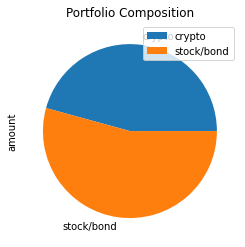

In [53]:
# Plot the total value of the member's portfolio (crypto and stock/bond) in a pie chart
savings_df.plot.pie(title="Portfolio Composition", y='amount')


#### Step 4: Using Python, determine if the current portfolio has enough to create an emergency fund as part of the member’s financial plan. Ideally, an emergency fund should equal to three times the member’s monthly income. To do this, implement the following steps:

Step 1. Create a variable named `emergency_fund_value`, and set it equal to three times the value of the member’s `monthly_income` of 12000. (You set this earlier in Part 1).

Step 2. Create a series of three if statements to determine if the member’s total portfolio is large enough to fund the emergency portfolio:

* If the total portfolio value is greater than the emergency fund value, display a message congratulating the member for having enough money in this fund.

* Else if the total portfolio value is equal to the emergency fund value, display a message congratulating the member on reaching this important financial goal.

* Else the total portfolio is less than the emergency fund value, so display a message showing how many dollars away the member is from reaching the goal. (Subtract the total portfolio value from the emergency fund value.)


##### Step 4-1: Create a variable named `emergency_fund_value`, and set it equal to three times the value of the member’s `monthly_income` of 12000. (You set this earlier in Part 1).

In [63]:
# Create a variable named emergency_fund_value
emergency_fund_value = 3* monthly_income
emergency_fund_value


36000

##### Step 4-2: Create a series of three if statements to determine if the member’s total portfolio is large enough to fund the emergency portfolio:

* If the total portfolio value is greater than the emergency fund value, display a message congratulating the member for having enough money in this fund.

* Else if the total portfolio value is equal to the emergency fund value, display a message congratulating the member on reaching this important financial goal.

* Else the total portfolio is less than the emergency fund value, so display a message showing how many dollars away the member is from reaching the goal. (Subtract the total portfolio value from the emergency fund value.)

In [64]:
# Evaluate the possibility of creating an emergency fund with 3 conditions:
if total_portfolio > emergency_fund_value:
    print(f"Congratulations! Your portfolio covers your emergency needs.")
elif total_portfolio == emergency_fund_value:
    print(f"Congratulations! You've reached an important financial goal; your portfolio equals your emegrency needs.")
else:
    print(f"Keep on saving, you are ${(emergency_fund_value-total_portfolio): .2f} from reaching your financial goal.")


Congratulations! Your portfolio covers your emergency needs.


## Part 2: Create a Financial Planner for Retirement

### Create the Monte Carlo Simulation

In this section, you’ll use the MCForecastTools library to create a Monte Carlo simulation for the member’s savings portfolio. To do this, complete the following steps:

1. Make an API call via the Alpaca SDK to get 3 years of historical closing prices for a traditional 60/40 portfolio split: 60% stocks (SPY) and 40% bonds (AGG).

2. Run a Monte Carlo simulation of 500 samples and 30 years for the 60/40 portfolio, and then plot the results.The following image shows the overlay line plot resulting from a simulation with these characteristics. However, because a random number generator is used to run each live Monte Carlo simulation, your image will differ slightly from this exact image:

![A screenshot depicts the resulting plot.](Images/5-4-monte-carlo-line-plot.png)

3. Plot the probability distribution of the Monte Carlo simulation. Plot the probability distribution of the Monte Carlo simulation. The following image shows the histogram plot resulting from a simulation with these characteristics. However, because a random number generator is used to run each live Monte Carlo simulation, your image will differ slightly from this exact image:

![A screenshot depicts the histogram plot.](Images/5-4-monte-carlo-histogram.png)

4. Generate the summary statistics for the Monte Carlo simulation.



#### Step 1: Make an API call via the Alpaca SDK to get 3 years of historical closing prices for a traditional 60/40 portfolio split: 60% stocks (SPY) and 40% bonds (AGG).

In [5]:
# Set start and end dates of 3 years back from your current date
# Alternatively, you can use an end date of 2020-08-07 and work 3 years back from that date 
start_date_monte = pd.Timestamp("2017-01-28", tz="America/New_York").isoformat()
end_date_monte = pd.Timestamp("2022-01-27", tz="America/New_York").isoformat()

# Set number of rows to 1000 to retrieve the maximum amount of rows
limit_rows = 1000

In [6]:
# Use the Alpaca get_barset function to make the API call to get the 3 years worth of pricing data
# The tickers and timeframe parameters should have been set in Part 1 of this activity 
# The start and end dates should be updated with the information set above
# Remember to add the df property to the end of the call so the response is returned as a DataFrame
prices_monte = alpaca.get_barset(tickers,
                                 timeframe,
                                start = start_date_monte,
                                end = end_date_monte,
                                limit = limit_rows,
                                ).df


# Display both the first and last five rows of the DataFrame
display(prices_monte.head())
display(prices_monte.tail())


AOA                                        UPRO  \
                            open    high      low    close    volume    open   
time                                                                           
2018-02-07 00:00:00-05:00  53.91  54.270  53.6600  53.6600  115910.0     NaN   
2018-02-08 00:00:00-05:00  53.72  53.730  52.2500  52.2500  107488.0  46.533   
2018-02-09 00:00:00-05:00  52.63  52.981  51.5462  52.5600  133046.0  42.680   
2018-02-12 00:00:00-05:00  53.03  53.510  52.8101  53.2800   66838.0  44.130   
2018-02-13 00:00:00-05:00  53.22  53.420  53.0316  53.3319  134467.0  44.127   

                                                               
                             high     low   close      volume  
time                                                           
2018-02-07 00:00:00-05:00     NaN     NaN     NaN         NaN  
2018-02-08 00:00:00-05:00  46.620  41.140  41.163  11611945.0  
2018-02-09 00:00:00-05:00  43.957  38.873  43.107  18225384.0  
2018-02-12 00:00:00-05:00  45.673  43.150  44.830  10294707.0  
2018-02-13 00:00:00-05:00  45.497  43.835  45.200   5661480.0

AOA                                     UPRO  \
                            open     high     low  close    volume   open   
time                                                                        
2022-01-21 00:00:00-05:00  70.16  70.3095  69.300  69.32  143244.0  62.68   
2022-01-24 00:00:00-05:00  68.68  69.1700  67.230  69.02  473386.0  57.02   
2022-01-25 00:00:00-05:00  68.48  69.2000  67.870  68.65  395455.0  57.40   
2022-01-26 00:00:00-05:00  69.29  69.5800  68.000  68.25  206620.0  60.43   
2022-01-27 00:00:00-05:00  68.89  69.1000  67.921  68.01  111678.0  59.44   

                                                               
                              high     low  close      volume  
time                                                           
2022-01-21 00:00:00-05:00  63.7000  59.430  59.46  22566971.0  
2022-01-24 00:00:00-05:00  60.4012  52.415  60.21  25582726.0  
2022-01-25 00:00:00-05:00  60.1350  55.000  58.00  15669971.0  
2022-01-26 00:00:00-05:00  61.7900  55.740  57.58  20031769.0  
2022-01-27 00:00:00-05:00  60.8000  55.970  56.71  17527217.0

#### Step 2: Run a Monte Carlo simulation of 500 samples and 30 years for the 60/40 portfolio, and then plot the results.

In [7]:
# Configure the Monte Carlo simulation to forecast 30 years cumulative returns
# The weights should be split 40% to AGG and 60% to SPY.
# Run 500 samples.
monte_avg_risk = MCSimulation(
    portfolio_data = prices_monte,
    weights = [.9,.1],
    num_simulation = 500,
    num_trading_days = 252*30
)

# Review the simulation input data
monte_avg_risk.portfolio_data.head()


AOA                                      \
                            open    high      low    close    volume   
time                                                                   
2018-02-07 00:00:00-05:00  53.91  54.270  53.6600  53.6600  115910.0   
2018-02-08 00:00:00-05:00  53.72  53.730  52.2500  52.2500  107488.0   
2018-02-09 00:00:00-05:00  52.63  52.981  51.5462  52.5600  133046.0   
2018-02-12 00:00:00-05:00  53.03  53.510  52.8101  53.2800   66838.0   
2018-02-13 00:00:00-05:00  53.22  53.420  53.0316  53.3319  134467.0   

                                          UPRO                          \
                          daily_return    open    high     low   close   
time                                                                     
2018-02-07 00:00:00-05:00          NaN     NaN     NaN     NaN     NaN   
2018-02-08 00:00:00-05:00    -0.026277  46.533  46.620  41.140  41.163   
2018-02-09 00:00:00-05:00     0.005933  42.680  43.957  38.873  43.107   
2018-02-12 00:00:00-05:00     0.013699  44.130  45.673  43.150  44.830   
2018-02-13 00:00:00-05:00     0.000974  44.127  45.497  43.835  45.200   

                                                    
                               volume daily_return  
time                                                
2018-02-07 00:00:00-05:00         NaN          NaN  
2018-02-08 00:00:00-05:00  11611945.0          NaN  
2018-02-09 00:00:00-05:00  18225384.0     0.047227  
2018-02-12 00:00:00-05:00  10294707.0     0.039970  
2018-02-13 00:00:00-05:00   5661480.0     0.008253

In [8]:
# Run the Monte Carlo simulation to forecast 30 years cumulative returns
monte_avg_risk.calc_cumulative_return()


Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/nicocortese/Desktop/boot_camp/challenges/5_challenge_5/challenge_5_financial_planning/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.986083,1.006512,0.996870,1.018099,1.009874,0.990186,0.990666,0.990051,1.000387,0.999766,...,0.979518,1.005357,1.013729,1.024374,1.010300,0.994574,1.007525,1.018459,0.983554,0.998995
2,0.982670,0.993091,1.005469,1.016150,1.013347,0.980174,1.001708,0.992913,0.995960,1.010318,...,0.967694,1.001797,1.017153,1.031153,0.991903,0.995576,1.013904,1.017183,0.984225,1.008703
3,0.972552,0.999122,0.999778,1.006322,0.997260,0.981505,1.014497,0.971054,0.993201,1.001690,...,0.962084,0.986624,1.027878,1.040286,0.976450,1.015700,0.991062,1.019816,0.978164,1.029134
4,0.966377,0.995133,0.996408,1.003135,0.999478,0.985615,1.024843,0.967328,0.997193,1.000738,...,0.949793,0.967232,1.028797,1.041127,0.960928,1.018932,0.978722,1.019162,0.985180,1.031617
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,236.741643,56.077172,72.936054,12.066040,158.794449,9.542373,40.532159,45.386731,85.129576,59.893842,...,27.201972,7.303675,48.872028,53.380717,32.449268,89.801628,15.372329,33.885788,72.278426,14.276878
7557,235.352224,55.365517,73.313332,12.037621,158.458779,9.330873,39.671725,45.709546,85.777682,60.490641,...,26.790110,7.163780,50.139255,53.544770,31.964133,88.689313,15.066838,34.079933,72.672871,14.079126
7558,230.407252,55.360039,73.901184,12.150591,158.617704,9.334464,39.842388,45.954600,87.458495,59.899742,...,26.636550,7.279535,50.915443,53.593275,31.552333,89.277119,14.828173,34.442182,72.026572,14.503703
7559,226.486270,53.801781,73.948056,11.988518,160.369095,9.131564,39.628756,45.937481,88.086831,59.723808,...,26.550708,7.450218,50.806191,53.116793,32.193950,89.354814,14.931878,34.529100,72.111805,14.475318


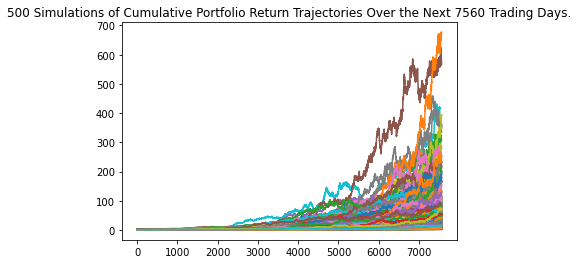

In [9]:
# Visualize the 30-year Monte Carlo simulation by creating an
# overlay line plot
avg_risk_line_plot = monte_avg_risk.plot_simulation()


#### Step 3: Plot the probability distribution of the Monte Carlo simulation.

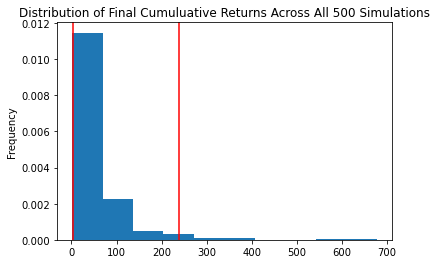

In [10]:
# Visualize the probability distribution of the 30-year Monte Carlo simulation 
# by plotting a histogram
avg_risk_distribution_plot = monte_avg_risk.plot_distribution()


#### Step 4: Generate the summary statistics for the Monte Carlo simulation.

In [11]:
# Generate summary statistics from the 30-year Monte Carlo simulation results
# Save the results as a variable
avg_risk_table = monte_avg_risk.summarize_cumulative_return()


# Review the 30-year Monte Carlo summary statistics
avg_risk_table

count           500.000000
mean             52.896008
std              69.223595
min               1.576821
25%              14.385388
50%              30.824136
75%              62.946000
max             676.918392
95% CI Lower      4.198494
95% CI Upper    239.699401
Name: 7560, dtype: float64

### Analyze the Retirement Portfolio Forecasts

Using the current value of only the stock and bond portion of the member's portfolio and the summary statistics that you generated from the Monte Carlo simulation, answer the following question in your Jupyter notebook:

-  What are the lower and upper bounds for the expected value of the portfolio with a 95% confidence interval?


In [79]:
# Print the current balance of the stock and bond portion of the members portfolio
total_stocks_bonds


69783.7

In [15]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes for the current stock/bond portfolio
ci_lower_thirty_cumulative_return = avg_risk_table[8]*70000
ci_upper_thirty_cumulative_return = avg_risk_table[9]*70000

# Print the result of your calculations
print(f"There is a 95% chance that this avg risk portfolio, starting with $70,000,"
      f" will end within in the range of"
      f" ${ci_lower_thirty_cumulative_return: .0f} and ${ci_upper_thirty_cumulative_return: .0f} over the next 30 years.")


There is a 95% chance that this avg risk portfolio, starting with $70,000, will end within in the range of $ 293895 and $ 16778958 over the next 30 years.


### Forecast Cumulative Returns in 10 Years

The CTO of the credit union is impressed with your work on these planning tools but wonders if 30 years is a long time to wait until retirement. So, your next task is to adjust the retirement portfolio and run a new Monte Carlo simulation to find out if the changes will allow members to retire earlier.

For this new Monte Carlo simulation, do the following: 

- Forecast the cumulative returns for 10 years from now. Because of the shortened investment horizon (30 years to 10 years), the portfolio needs to invest more heavily in the riskier asset&mdash;that is, stock&mdash;to help accumulate wealth for retirement. 

- Adjust the weights of the retirement portfolio so that the composition for the Monte Carlo simulation consists of 20% bonds and 80% stocks. 

- Run the simulation over 500 samples, and use the same data that the API call to Alpaca generated.

- Based on the new Monte Carlo simulation, answer the following questions in your Jupyter notebook:

    - Using the current value of only the stock and bond portion of the member's portfolio and the summary statistics that you generated from the new Monte Carlo simulation, what are the lower and upper bounds for the expected value of the portfolio (with the new weights) with a 95% confidence interval?

    - Will weighting the portfolio more heavily toward stocks allow the credit union members to retire after only 10 years?


In [16]:
# Configure a Monte Carlo simulation to forecast 10 years cumulative returns
# The weights should be split 20% to AGG and 80% to SPY.
# Run 500 samples.
monte_high_risk = MCSimulation(
    portfolio_data = prices_monte,
    weights = [.8,.2],
    num_simulation = 500,
    num_trading_days = 252*30
)

# Review the simulation input data
monte_high_risk.portfolio_data.head()


AOA                                      \
                            open    high      low    close    volume   
time                                                                   
2018-02-07 00:00:00-05:00  53.91  54.270  53.6600  53.6600  115910.0   
2018-02-08 00:00:00-05:00  53.72  53.730  52.2500  52.2500  107488.0   
2018-02-09 00:00:00-05:00  52.63  52.981  51.5462  52.5600  133046.0   
2018-02-12 00:00:00-05:00  53.03  53.510  52.8101  53.2800   66838.0   
2018-02-13 00:00:00-05:00  53.22  53.420  53.0316  53.3319  134467.0   

                                          UPRO                          \
                          daily_return    open    high     low   close   
time                                                                     
2018-02-07 00:00:00-05:00          NaN     NaN     NaN     NaN     NaN   
2018-02-08 00:00:00-05:00    -0.026277  46.533  46.620  41.140  41.163   
2018-02-09 00:00:00-05:00     0.005933  42.680  43.957  38.873  43.107   
2018-02-12 00:00:00-05:00     0.013699  44.130  45.673  43.150  44.830   
2018-02-13 00:00:00-05:00     0.000974  44.127  45.497  43.835  45.200   

                                                    
                               volume daily_return  
time                                                
2018-02-07 00:00:00-05:00         NaN          NaN  
2018-02-08 00:00:00-05:00  11611945.0          NaN  
2018-02-09 00:00:00-05:00  18225384.0     0.047227  
2018-02-12 00:00:00-05:00  10294707.0     0.039970  
2018-02-13 00:00:00-05:00   5661480.0     0.008253

In [17]:
# Run the Monte Carlo simulation to forecast 10 years cumulative returns
monte_high_risk.calc_cumulative_return()


Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/nicocortese/Desktop/boot_camp/challenges/5_challenge_5/challenge_5_financial_planning/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.040585,0.998624,0.986677,1.003136,0.972204,1.041794,0.996746,1.001793,0.994933,1.022109,...,1.002087,0.996487,0.964226,1.020598,1.014279,0.984954,1.010983,1.000333,0.998957,1.009250
2,1.024479,0.997819,1.001978,1.011584,0.994513,1.050385,0.984968,1.027139,0.983268,1.039494,...,1.030922,0.954697,0.980748,1.009510,1.025599,1.006497,1.003776,0.997993,1.018677,0.999618
3,1.051157,0.986120,1.005673,0.989955,0.980708,1.073241,0.958629,1.030064,0.964977,1.043629,...,1.013746,0.952574,0.972122,0.999135,1.029286,0.988766,0.997026,0.950194,1.013230,1.016087
4,1.070963,0.964952,1.033103,0.998612,0.966229,1.096104,0.960789,1.040548,0.969261,1.025846,...,1.010617,0.959971,0.955327,1.007014,1.054717,0.989210,0.993325,0.960120,1.020824,1.005152
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,115.970676,210.047382,7.064159,77.149486,6.825899,2303.144138,62.248621,109.511840,1.283645,482.083294,...,74.030529,339.807373,58.927665,84.067282,225.453634,69.196618,3.007535,222.786862,426.051928,682.949677
7557,118.404662,207.399885,7.173775,77.715826,6.909719,2299.563166,61.257207,107.904097,1.289391,480.665483,...,73.825010,343.716233,60.439687,86.092927,231.146933,66.641951,3.017203,224.467906,417.545670,669.894356
7558,120.381933,209.981838,7.252720,78.325080,7.012462,2280.758157,61.964468,105.061798,1.279460,490.810815,...,74.214296,349.031880,60.479231,88.438125,232.796512,68.050093,3.029072,224.955533,414.974945,679.952534
7559,120.185273,209.419596,7.213890,78.161048,7.305712,2301.638899,62.672370,106.193643,1.274968,505.550313,...,74.506407,353.509107,58.795989,88.964956,232.936968,67.952168,3.088887,230.342842,428.518318,696.323290


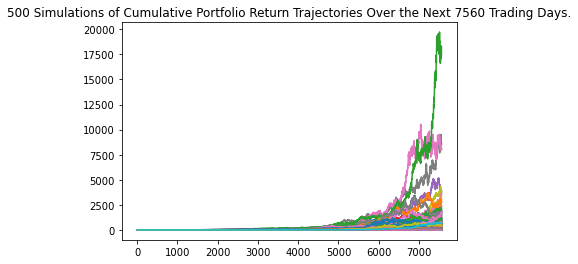

In [18]:
# Visualize the 10-year Monte Carlo simulation by creating an
# overlay line plot
high_risk_line_plot = monte_high_risk.plot_simulation()


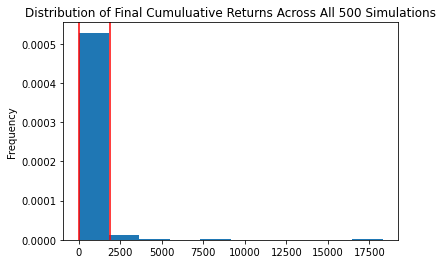

In [19]:
# Visualize the probability distribution of the 10-year Monte Carlo simulation 
# by plotting a histogram
high_risk_distribution_plot = monte_high_risk.plot_distribution()


In [87]:
# Generate summary statistics from the 10-year Monte Carlo simulation results
# Save the results as a variable
high_risk_table = monte_high_risk.summarize_cumulative_return()


# Review the 10-year Monte Carlo summary statistics
high_risk_table

count           500.000000
mean              4.687612
std               2.654293
min               0.772621
25%               2.784076
50%               4.101473
75%               5.921088
max              19.939381
95% CI Lower      1.487167
95% CI Upper     11.530633
Name: 2520, dtype: float64

### Answer the following questions:

#### Question: Using the current value of only the stock and bond portion of the member's portfolio and the summary statistics that you generated from the new Monte Carlo simulation, what are the lower and upper bounds for the expected value of the portfolio (with the new weights) with a 95% confidence interval?

In [88]:
# Print the current balance of the stock and bond portion of the members portfolio
total_stocks_bonds


69783.7

In [90]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes for the current stock/bond portfolio
ci_lower_ten_cumulative_return = high_risk_table[8]*total_stocks_bonds
ci_upper_ten_cumulative_return = high_risk_table[9]*total_stocks_bonds

# Print the result of your calculations

print(f"There is a 95% chance that this high risk portfolio, starting with ${total_stocks_bonds: .2f},"
      f" will end within in the range of"
      f" ${ci_lower_ten_cumulative_return: .0f} and ${ci_upper_ten_cumulative_return: .0f} over the next 10 years.")


There is a 95% chance that this high risk portfolio, starting with $ 69783.70, will end within in the range of $ 103780 and $ 804650 over the next 10 years.


#### Question: Will weighting the portfolio more heavily to stocks allow the credit union members to retire after only 10 years?